In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/subasreebalamurali/Desktop/subasree/Data Analyst/projects/Bitcoin Data Analysis/Bitcoin/bitcoin_price_Training - Training.csv')

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [8]:
#Data Preprocessing
#df is the raw data, next is the transformation phase
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [13]:
#date is in object --> convert to date time
df['Date'] = df['Date'].astype('datetime64[ns]')

In [14]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [15]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [19]:
#check for missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [21]:
#check duplicate values
df.duplicated().sum()

0

In [22]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [23]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [34]:
data = df.sort_index().reset_index()

In [35]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...,...
1551,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [36]:
#what was the change in price of the stock overtime?  
#Exploratory Data Analysis
data.drop('index', axis = 1, inplace=True)

In [37]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

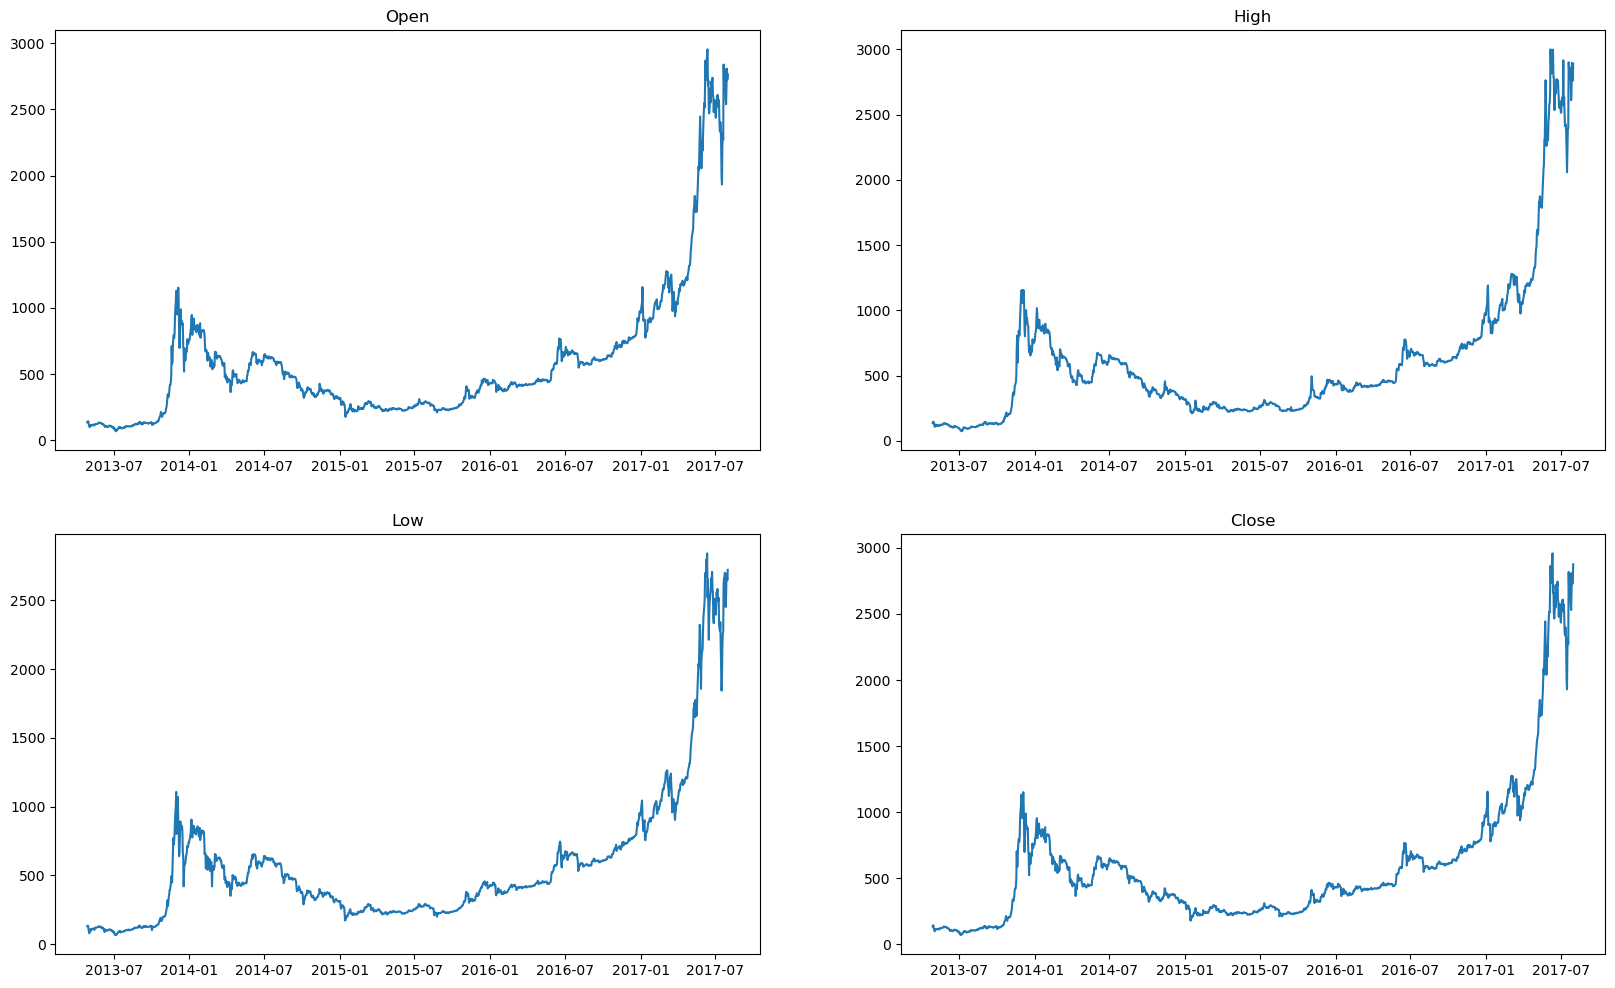

In [39]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

In [42]:
#Analyzing open, high, low, close value of Bitcoin
#candlestick plot is better for multiple features
#sample data
bitcoin_sample = data[0:50]

In [43]:
!pip install chart_studio
!pip install plotly 

In [44]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [45]:
init_notebook_mode(connected=True)

In [47]:
trace = go.Candlestick(x=bitcoin_sample['Date'], 
               high = bitcoin_sample['High'], 
               open = bitcoin_sample['Open'], 
               close = bitcoin_sample['Close'], 
               low = bitcoin_sample['Low'])

In [55]:
candlestick_data = [trace]
layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title': 'Date'}
}

In [56]:
fig = go.Figure(data = candlestick_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [63]:
#analyzing closing price
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


<AxesSubplot:xlabel='Date'>

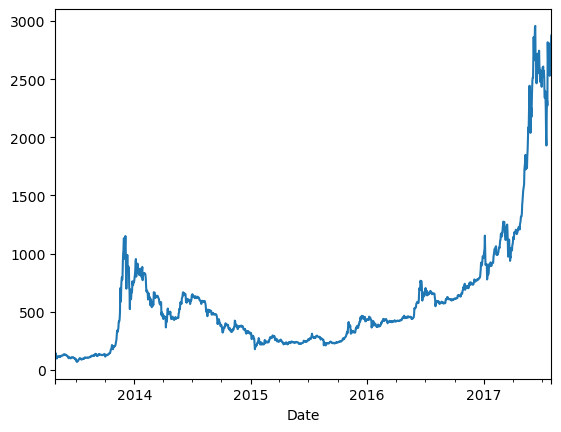

In [67]:
data['Close'].plot()

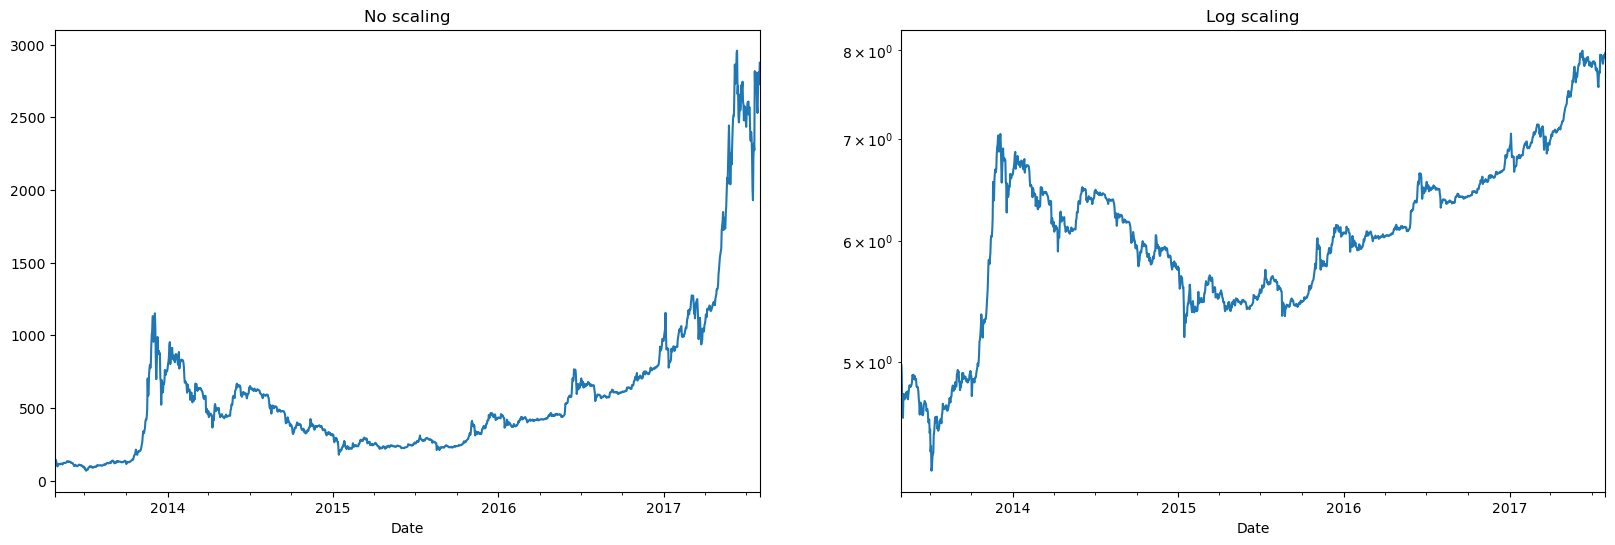

In [69]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [70]:
#analyze closing price on yearly, quarterly, monthly basis
#data resampling
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

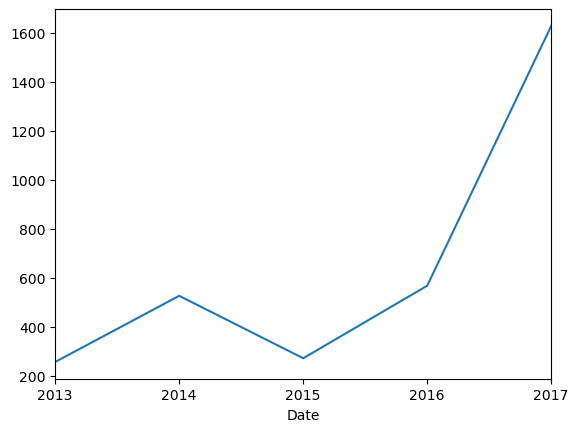

In [71]:
data['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

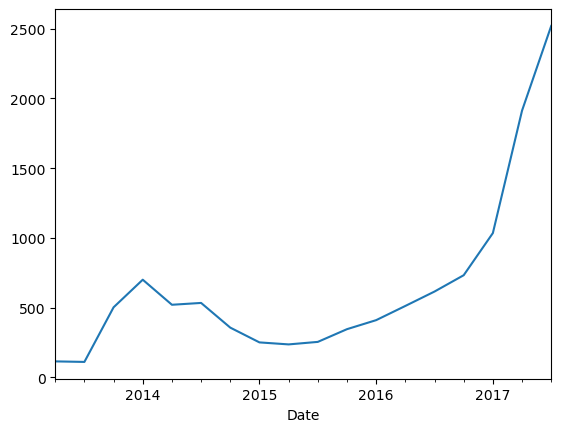

In [72]:
data['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

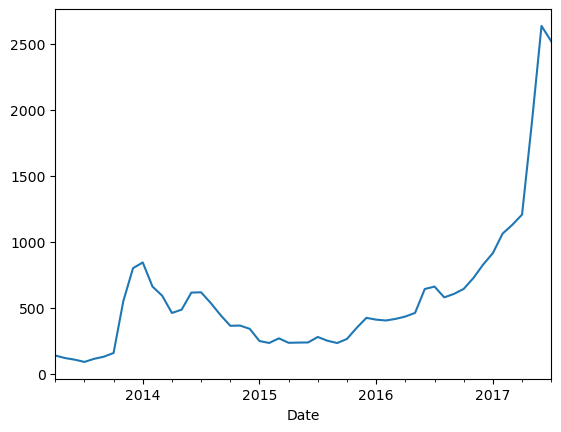

In [73]:
data['Close'].resample('M').mean().plot()

In [75]:
#analyzing daily change in closing price of stocks
data['Close_Price_pct_change'] = data['Close'].pct_change()*100

<AxesSubplot:xlabel='Date'>

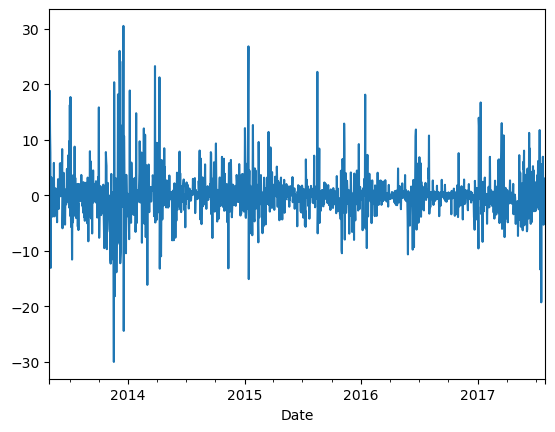

In [77]:
data['Close_Price_pct_change'].plot()

In [79]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [83]:
#if cufflinks doesn't work
conda remove cufflinks-py

Solving environment: failed

PackagesNotFoundError: The following packages are missing from the target environment:
  - cufflinks-py



Note: you may need to restart the kernel to use updated packages.


In [84]:
conda install -c conda-forge python-cufflinks

done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py39hecd8cb5_0
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/osx-64::hvplot==0.8.0=py39hecd8cb5_0
  - defaults/osx-64::conda-build==3.22.0=py39hecd8cb5_0
  - defaults/osx-64::sphinx==5.0.2=py39hecd8cb5_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd8cb5_1
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/osx-64::dask==2022.7.0=py39hecd8cb5_0
  - defaults/osx-64::jupyter_server==1.18.1=py39hecd8cb5_0
  - defaults/noarch::jinja2-time==0.2.0=pyhd3eb1b0_3
  - defaults/noarch::jupyterlab_serve

In [88]:
import cufflinks as cf

In [89]:
cf.go_offline()

In [90]:
data['Close_Price_pct_change'].iplot()